In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

#city_data_df = city_data_df.drop_duplicates('city')

# Combine the data into a single dataset
combined_pyber_df = pd.merge(ride_data_df, city_data_df, on='city', how='left')

# Display the data table for preview
combined_pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

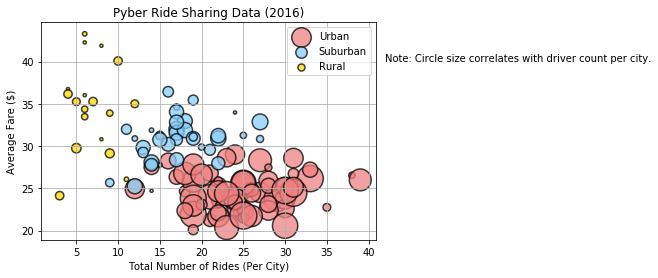

In [2]:
# Obtain the x and y coordinates for each of the three city types
#3 city type; urban, suburban, rural
city_types = city_data_df.set_index("city")["type"]

#x axis = total number of rides per city
total_rides = combined_pyber_df.groupby("city")["ride_id"].count()

#y axis = average fare
avg_fare = combined_pyber_df.groupby("city")["fare"].mean()

#plot size = total number of drivers
total_drivers = combined_pyber_df.groupby("city")["driver_count"].mean()

#combine into data frame
df = pd.DataFrame({"Total Number of Rides": total_rides,
                  "Average Fare": avg_fare,
                  "Total Number of Drivers": total_drivers,
                  "City Types": city_types})

#sep df's for city type for plots
urban = df[df["City Types"] == "Urban"]
suburban = df[df["City Types"] == "Suburban"]
rural = df[df["City Types"] == "Rural"]

# Build the scatter plots for each city types
#You must stick to the Pyber color scheme (Gold, Light Sky Blue, and Light Coral) in producing your plot and pie charts.
#When making your Bubble Plot, experiment with effects like alpha, edgecolor, and linewidths.
#Urban
plt.scatter(urban["Total Number of Rides"], urban["Average Fare"], marker="o", color="lightcoral", edgecolors="black",
            s= urban["Total Number of Drivers"]*10, alpha = 0.75, linewidth = 1.5, label = "Urban")

#suburban
plt.scatter(suburban["Total Number of Rides"], suburban["Average Fare"], marker="o", color="lightskyblue", edgecolors="black",
            s= suburban["Total Number of Drivers"]*10, alpha = 0.75, linewidth = 1.5, label = "Suburban")

#rural
plt.scatter(rural["Total Number of Rides"], rural["Average Fare"], marker="o", color="gold", edgecolors="black",
            s= rural["Total Number of Drivers"]*10, alpha = 0.75, linewidth = 1.5, label = "Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
plt.legend(loc="upper right")

# Incorporate a text label regarding circle size
plt.text(42,40,"Note: Circle size correlates with driver count per city.")

# Save Figure
plt.savefig("pyber.png")

# Show plot
plt.show()

## Total Fares by City Type

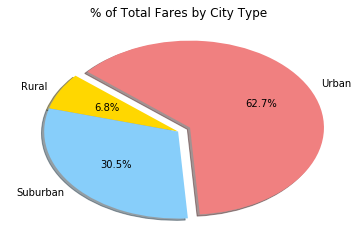

In [3]:
# Calculate Type Percents
type_df = combined_pyber_df.groupby("type")["type", "fare", "ride_id", "driver_count"]

# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = type_df.sum()["fare"]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Incorporate the other graph properties
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("totalfarebycity.png")

# Show Figure
plt.show()

## Total Rides by City Type

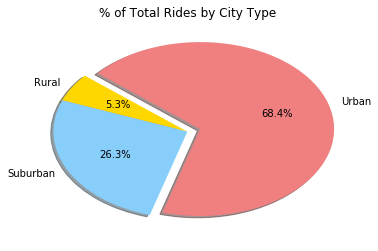

In [4]:
# Calculate Ride Percents
# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = type_df.count()["ride_id"]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Incorporate the other graph properties
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("totalridesbycity.png")

# Show Figure
plt.show()

## Total Drivers by City Type

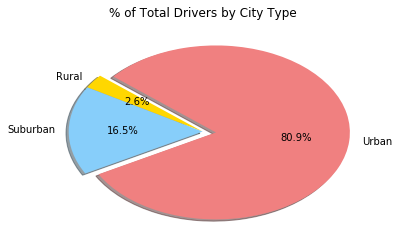

In [5]:
# Calculate Driver Percents
# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
total = city_data_df.sum()["driver_count"]
sizes = city_data_df.groupby("type").sum()["driver_count"]/ total

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Incorporate the other graph properties
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("totaldriversbycity.png")

# Show Figure
plt.show()